In [ ]:
!pip install torchmetrics

     |████████████████████████████████| 332 kB 5.2 MB/s 


In [ ]:
!pip install ipdb

     |████████████████████████████████| 791 kB 3.3 MB/s 
     |████████████████████████████████| 374 kB 38.7 MB/s 
  Created wheel for ipdb: filename=ipdb-0.13.9-py3-none-any.whl size=11648 sha256=07f471342536476c060330532fd882ceba8b78807783d4887dce1923e99d7c7c
  Stored in directory: /root/.cache/pip/wheels/65/cd/cc/aaf92acae337a28fdd2aa4d632196a59745c8c39f76eaeed01
Successfully built ipdb
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 

In [ ]:
! pip install ipdb

In [ ]:
! pip uninstall numpy
! pip install numpy -I
! pip install numpy -U

Found existing installation: numpy 1.19.5
Uninstalling numpy-1.19.5:
  Would remove:
    /usr/bin/f2py
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.7
    /usr/local/lib/python3.7/dist-packages/numpy-1.19.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libopenblasp-r0-09e95953.3.13.so
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libz-eb09ad1d.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.19.5
     |████████████████████████████████| 15.7 MB 5.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 wh

In [ ]:
import pandas as pd
import numpy as np
from string import punctuation
from collections import Counter
import re
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from torch.nn.utils.rnn import pad_sequence
import torch.optim as optim
import ipdb
import torchmetrics
from torchmetrics import F1
from torchmetrics.functional import f1, recall
import matplotlib.pyplot as plt

In [ ]:
!wget https://www.dropbox.com/s/tn6x5f4ybaj34zf/Fake.csv?dl=0 -O data.csv

--2021-12-29 16:02:59--  https://www.dropbox.com/s/tn6x5f4ybaj34zf/Fake.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/tn6x5f4ybaj34zf/Fake.csv [following]
--2021-12-29 16:02:59--  https://www.dropbox.com/s/raw/tn6x5f4ybaj34zf/Fake.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce4fa12b46d8fcd6065825560d0.dl.dropboxusercontent.com/cd/0/inline/Bcyzrnw6aUl6gEIlV03UDh5vdZ2u6LdrHIQP6HZYIC1Ypc0l6imQr08Vp3F-qQdHT9GwqNba5u_irI_P8VaovBq4b1KsoI60Dw6nmKkOVh88DkNl0wBB6leeLMs-GdJpKg8JtujqC1bN2eFVLyAsjWHR/file# [following]
--2021-12-29 16:03:00--  https://uce4fa12b46d8fcd6065825560d0.dl.dropboxusercontent.com/cd/0/inline/Bcyzrnw6aUl6gEIlV03UDh5vdZ2u6LdrHIQP6HZYIC1Ypc0l6imQr08Vp3F-qQdHT9GwqNba5u_irI_P8VaovBq4b1KsoI60D

In [ ]:
all_news_data = pd.read_csv('data.csv', encoding='utf-8', header=0, names=['title','text','subject','date'])
all_news_data


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
def cleaning(data):
  data = data.lower()
  data = re.sub(r'[^A-za-z]+', ' ', data)
  return data

In [ ]:
all_news_data['cleaned'] = all_news_data.text.apply(cleaning)
all_news_data

,title,text,subject,date,cleaned
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",donald trump just couldn t wish all americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",on friday it was revealed that former milwauke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",on christmas day donald trump announced that h...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",pope francis used his annual christmas day mes...
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",st century wire says as wire reported earlier...
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",st century wire says it s a familiar theme wh...
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",patrick henningsen st century wireremember whe...
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",st century wire says al jazeera america will ...


In [ ]:
all_news_data["subject"].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [ ]:
numbers = {"subject":     {"News": 0, 
                                "politics": 1,
                                "left-news": 2,
                                "Government News": 3,
                                "US_News": 4,
                                "Middle-east": 5}}

In [ ]:
all_news_data = all_news_data.replace(numbers)

In [ ]:
train_sentences, val_sentences = train_test_split(all_news_data, test_size=0.2)

In [ ]:
vocab = Counter()

for text in all_news_data['text']:
    vocab.update(text.split())
print('всего уникальных токенов:', len(vocab))
filtered_vocab = set()

for word in vocab:
    if vocab[word] > 5:
        filtered_vocab.add(word)
print('уникальных токенов, втретившихся больше 5 раз:', len(filtered_vocab))

всего уникальных токенов: 293553
уникальных токенов, втретившихся больше 5 раз: 56380


In [ ]:
word2id = {'PAD':0}

for word in filtered_vocab:
    word2id[word] = len(word2id)

id2word = {i:word for word, i in word2id.items()}

In [ ]:
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
DEVICE

device(type='cuda')

In [ ]:
class NewsDataset(Dataset):
    def __init__(self, dataset, col, target_col, word2id, max_len, DEVICE):
        self.dataset = dataset[col].values
        self.word2id = word2id
        self.length = dataset.shape[0]
        self.target = torch.Tensor(dataset[target_col].values)
        self.max_len = max_len
        self.device = DEVICE
    
    def __len__(self):
        return self.length

    def __getitem__(self, index): 
        tokens = self.dataset[index].split()
        ids = torch.LongTensor([self.word2id[token] if token in self.word2id else self.word2id['PAD'] for token in tokens][:self.max_len])
        y = [self.target[index]]
        return ids, y

    def collate_fn(self, batch):
      ids, y = list(zip(*batch))
      padded_ids = torch.vstack([F.pad(seq, pad=(0, self.max_len - seq.shape[0]), mode='constant', value=0) for seq in ids])
      padded_ids = pad_sequence(ids, batch_first=True).to(self.device)
      y = torch.LongTensor(y).to(self.device)
      return padded_ids, y.T[0]

In [ ]:
train_dataset = NewsDataset(train_sentences, 'cleaned', 'subject', word2id, 400, DEVICE)
train_sampler = RandomSampler(train_dataset)
train_iterator = DataLoader(train_dataset, collate_fn = train_dataset.collate_fn, sampler=train_sampler, batch_size=64)

In [ ]:
val_dataset = NewsDataset(val_sentences, 'text', 'subject', word2id, 400, DEVICE)
val_sampler = SequentialSampler(val_dataset)
val_iterator = DataLoader(val_dataset, collate_fn = val_dataset.collate_fn, sampler=val_sampler, batch_size=64)

In [ ]:
! wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-12-29 16:03:14--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.206.16
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.206.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  70.7MB/s    in 24s     

2021-12-29 16:03:38 (65.2 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
import gensim

w2v = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
weights = np.zeros((len(word2id), 300))

for word, i in word2id.items():
    try:
        weights[i] = w2v[word]
    except KeyError:
        weights[i] = np.random.uniform(-0.25, 0.25, 300)

weights = torch.FloatTensor(weights).to(DEVICE)

In [ ]:
import tensorflow as tf

In [ ]:
class clstm_clf(nn.Module):
    def __init__(self, vocab_size, dropout_lstm = True, dropout_start = False, max_length = 512, embedding_dim=300, dropout=0.5, kernel_sizes=[2, 3, 4]):
      super().__init__()
      self.max_length = max_length
      self.vocab_size = vocab_size
      self.dropout = nn.Dropout(p=dropout)
      self.embedding = nn.Embedding(vocab_size, embedding_dim)
      self.embedding.from_pretrained(torch.tensor(weights))
      self.m_length = max_length - max(kernel_sizes) + 1
      self.kernel_sizes = kernel_sizes
      convs = []
      for size in kernel_sizes:
        conv = nn.Conv1d(in_channels=embedding_dim, out_channels=150, kernel_size=size, padding='valid')
        convs.append(conv)
      self.conv_layers = nn.ModuleList(convs)
      self.lstm = nn.LSTM(input_size=len(kernel_sizes) * 150, hidden_size=150, num_layers=1, batch_first=True)
      self.out = nn.Softmax(dim=1)           
      self.relu = nn.ReLU()
      self.linear = nn.Linear(150, 6)
      self.dropout_start = dropout_start
      self.dropout_lstm = dropout_lstm

    def forward(self, text):

      embedded = self.embedding(text)
      embedded = embedded.transpose(1, 2)
      if self.dropout_start:
        embedded = self.dropout(embedded)

      output = []
      for conv in self.conv_layers:
        layer = conv(embedded)
        hidden = self.relu(layer)[:, :, :self.m_length]
        output.append(hidden)


      if len(self.kernel_sizes) > 1:
        rnn_inputs = torch.cat(output, 1).transpose(1, 2)
      else:
        rnn_inputs = hidden.transpose(1, 2)

        # LSTM
      _, (hidden_state, _) = self.lstm(rnn_inputs)
      if self.dropout_lstm:
        embedded = self.dropout(hidden_state)
      logits = self.out(self.linear(torch.squeeze(hidden_state, 0)))

      return logits


In [ ]:
def train(model, iterator, optimizer, criterion):
    epoch_loss = 0 # для подсчета среднего лосса на всех батчах

    model.train()  # ставим модель в обучение, явно указываем, что сейчас надо будет хранить градиенты у всех весов

    for i, (texts, ys) in enumerate(iterator): #итерируемся по батчам
        optimizer.zero_grad()  #обнуляем градиенты
        preds = model(texts)  #прогоняем данные через модель
        loss = criterion(preds, ys) #считаем значение функции потерь  
        loss.backward() #считаем градиенты  
        optimizer.step() #обновляем веса 
        epoch_loss += loss.item() #сохраняем значение функции потерь
        if not (i + 1) % int(len(iterator)/5):
            print(f'Train loss: {epoch_loss/i}')      
    return  epoch_loss / len(iterator) # возвращаем среднее значение лосса по всей выборке

In [ ]:
def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_metric = 0
    model.eval() 
    with torch.no_grad():
        for i, (texts, ys) in enumerate(iterator):   
            preds = model(texts)  # делаем предсказания на тесте
            loss = criterion(preds, ys)   # считаем значения функции ошибки для статистики  
            epoch_loss += loss.item()
            batch_metric = f1(preds.argmax(1).long(), ys.long(), ignore_index=0)
            epoch_metric += batch_metric
            if i != 0:
                if not (i + 1) % int(len(iterator)/5):
                  #print(f'длина итератора: ', len(iterator))
                  print(f'Val loss: {epoch_loss/i}, Val f1: {epoch_metric/i}')
        
    return epoch_metric / len(iterator), epoch_loss / len(iterator) # возвращаем среднее значение по всей выборке

In [ ]:
def learning(n_epochs, model, optimizer, criterion):
    for i in range(n_epochs):
        print(f'\nstarting Epoch {i}')
        print('Training...')
        epoch_loss = train(model, train_iterator, optimizer, criterion)
        losses.append(epoch_loss)
        print('\nEvaluating on train...')
        f1_on_train,_ = evaluate(model, train_iterator, criterion)
        f1s.append(f1_on_train.cpu())
        print('\nEvaluating on test...')
        f1_on_test, epoch_loss_on_test = evaluate(model, val_iterator, criterion)
        losses_eval.append(epoch_loss_on_test)
        f1s_eval.append(f1_on_test.cpu())

Для начала построим обычную модель с параметрами по умолчанию

In [ ]:
#from warnings import filters
model = clstm_clf(vocab_size=len(word2id), dropout_lstm=0, max_length=400).to(DEVICE)
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001, weight_decay=0.0001)
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(DEVICE)

losses = []
losses_eval = []
f1s = []
f1s_eval = []

for i in range(10):
    print(f'\nstarting Epoch {i}')
    print('Training...')
    epoch_loss = train(model, train_iterator, optimizer, criterion)
    losses.append(epoch_loss)
    print('\nEvaluating on train...')
    f1_on_train,_ = evaluate(model, train_iterator, criterion)
    f1s.append(f1_on_train)
    print('\nEvaluating on test...')
    f1_on_test, epoch_loss_on_test = evaluate(model, val_iterator, criterion)
    losses_eval.append(epoch_loss_on_test)
    f1s_eval.append(f1_on_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  



starting Epoch 0
Training...
Train loss: 1.63560408249236
Train loss: 1.581218783751778
Train loss: 1.5534189946389612
Train loss: 1.5388481720185383
Train loss: 1.525228424055766

Evaluating on train...
Val loss: 1.5020884066297298, Val f1: 0.3943246304988861
Val loss: 1.4892971453459367, Val f1: 0.39152970910072327
Val loss: 1.4783148083383637, Val f1: 0.39379334449768066
Val loss: 1.4733556168419975, Val f1: 0.39427217841148376
Val loss: 1.4718144018344814, Val f1: 0.3962651491165161

Evaluating on test...
Val loss: 1.6155405411353478, Val f1: 0.38962361216545105
Val loss: 1.5497886604732938, Val f1: 0.388521671295166
Val loss: 1.535812819876322, Val f1: 0.38588660955429077
Val loss: 1.5243358633734962, Val f1: 0.38401103019714355
Val loss: 1.519530579663705, Val f1: 0.3812240958213806

starting Epoch 1
Training...
Train loss: 1.4998539142441332
Train loss: 1.4875315365584
Train loss: 1.479545014442047
Train loss: 1.4727812019777504
Train loss: 1.4714953111529763

Evaluating on tra

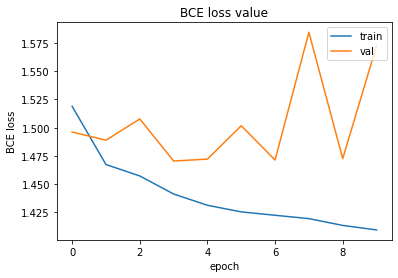

In [ ]:
plt.plot(losses)
plt.plot(losses_eval)
plt.title('BCE loss value')
plt.ylabel('BCE loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
plt.plot(f1s)
plt.plot(f1s_eval)
plt.title('f1 value')
plt.ylabel('f1 value')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Получилось так себе, вероятно, произошло переобучение.

Попробуем поэксперементировать с гиперпараметрами
1. Разные фильтры

In [ ]:
results = []
kernels = [[2], [3], [4], [2, 3], [2, 4], [3, 4]]
for k in kernels:
  result = []
  model = clstm_clf(vocab_size=len(word2id), kernel_sizes = k, max_length=400).to(DEVICE)
  optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001, weight_decay=0.0001)
  criterion = nn.CrossEntropyLoss()
  criterion = criterion.to(DEVICE)

  losses = []
  losses_eval = []
  f1s = []
  f1s_eval = []

  for i in range(5):
      print(f'\nstarting Epoch {i}')
      print('Training...')
      epoch_loss = train(model, train_iterator, optimizer, criterion)
      losses.append(epoch_loss)
      print('\nEvaluating on train...')
      f1_on_train,_ = evaluate(model, train_iterator, criterion)
      f1s.append(f1_on_train)
      print('\nEvaluating on test...')
      f1_on_test, epoch_loss_on_test = evaluate(model, val_iterator, criterion)
      losses_eval.append(epoch_loss_on_test)
      f1s_eval.append(f1_on_test)
  result.append([k, losses,losses_eval, f1s, f1s_eval])
  results.append(result)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  



starting Epoch 0
Training...
Train loss: 1.6327577390168841
Train loss: 1.563863375912542
Train loss: 1.5344809259293397
Train loss: 1.5175888197762626
Train loss: 1.5088469503660102

Evaluating on train...
Val loss: 1.4866908495886284, Val f1: 0.40846019983291626
Val loss: 1.4710051173749177, Val f1: 0.4045203924179077
Val loss: 1.4732745472406377, Val f1: 0.3976902961730957
Val loss: 1.4715660511157214, Val f1: 0.39591485261917114
Val loss: 1.4692685538097237, Val f1: 0.3969951570034027

Evaluating on test...
Val loss: 1.620012723482572, Val f1: 0.4299171268939972
Val loss: 1.58143651926959, Val f1: 0.3846825063228607
Val loss: 1.55940771684414, Val f1: 0.38558700680732727
Val loss: 1.5540656393224543, Val f1: 0.3759479522705078
Val loss: 1.5469692306242127, Val f1: 0.37395381927490234

starting Epoch 1
Training...
Train loss: 1.4939122911085163
Train loss: 1.4796699192212976
Train loss: 1.4732692861832635
Train loss: 1.4713410722228872
Train loss: 1.4706501758634838

Evaluating on 

In [ ]:
print(results) 

[[[[2], [1.5025806471604068, 1.4651590735733915, 1.4582108470047412, 1.433232230394065, 1.4207129831216774], [1.5212251028499089, 1.4981490438048903, 1.5749194009883984, 1.5005123615264893, 1.4840987211949117], [tensor(0.3947, device='cuda:0'), tensor(0.3948, device='cuda:0'), tensor(0.4395, device='cuda:0'), tensor(0.4593, device='cuda:0'), tensor(0.4513, device='cuda:0')], [tensor(0.3712, device='cuda:0'), tensor(0.3789, device='cuda:0'), tensor(0.3683, device='cuda:0'), tensor(0.4060, device='cuda:0'), tensor(0.3943, device='cuda:0')]]], [[[3], [1.5300323038685077, 1.4644614162088252, 1.4469153860799309, 1.4374778651866784, 1.4309300901938458], [1.510381635781881, 1.5256404522302989, 1.4966942361883215, 1.4748306934897963, 1.4969312854715295], [tensor(0.3916, device='cuda:0'), tensor(0.4237, device='cuda:0'), tensor(0.4140, device='cuda:0'), tensor(0.4338, device='cuda:0'), tensor(0.3509, device='cuda:0')], [tensor(0.3764, device='cuda:0'), tensor(0.3873, device='cuda:0'), tensor(0.

TypeError: ignored

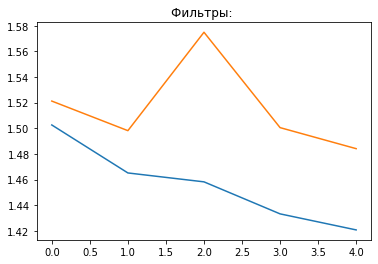

In [ ]:
for res in results:
  plt.plot(res[0][1])
  plt.plot(res[0][2])
  plt.title('Фильтры: ', res[0][0])
  plt.ylabel('BCE loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper right')
  plt.show()

In [ ]:
for res in results:
  plt.plot([0][3])
  plt.plot([0][4])
  plt.title('f1 value')
  plt.ylabel('f1 value')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper right')
  plt.show()

2. Поменяем коэффициент регуляризации

In [ ]:
#from warnings import filters
model = clstm_clf(vocab_size=len(word2id), max_length=400).to(DEVICE)
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001, weight_decay=0.001) 
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(DEVICE)

losses = []
losses_eval = []
f1s = []
f1s_eval = []

for i in range(5):
    print(f'\nstarting Epoch {i}')
    print('Training...')
    epoch_loss = train(model, train_iterator, optimizer, criterion)
    losses.append(epoch_loss)
    print('\nEvaluating on train...')
    f1_on_train,_ = evaluate(model, train_iterator, criterion)
    f1s.append(f1_on_train)
    print('\nEvaluating on test...')
    f1_on_test, epoch_loss_on_test = evaluate(model, val_iterator, criterion)
    losses_eval.append(epoch_loss_on_test)
    f1s_eval.append(f1_on_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  



starting Epoch 0
Training...
Train loss: 1.6200228072049325
Train loss: 1.5558227072591366
Train loss: 1.5313680985070377
Train loss: 1.5123645051733239
Train loss: 1.5068469864274392

Evaluating on train...
Val loss: 1.4832979315205623, Val f1: 0.41007521748542786
Val loss: 1.478351294476053, Val f1: 0.40130415558815
Val loss: 1.4721303089505675, Val f1: 0.40350672602653503
Val loss: 1.4711373605769433, Val f1: 0.3981732130050659
Val loss: 1.4698949825392462, Val f1: 0.3979520797729492

Evaluating on test...
Val loss: 1.5938015626027033, Val f1: 0.4389457404613495
Val loss: 1.5526887310875788, Val f1: 0.39722251892089844
Val loss: 1.5283448347231237, Val f1: 0.39942604303359985
Val loss: 1.5263785037127409, Val f1: 0.3872881531715393
Val loss: 1.5184068576149319, Val f1: 0.38566848635673523

starting Epoch 1
Training...
Train loss: 1.5026471029248154
Train loss: 1.4850074664406154
Train loss: 1.4786268465780799
Train loss: 1.477574313357795
Train loss: 1.4742723534263955

Evaluating 

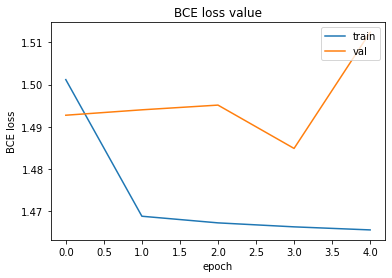

In [ ]:
plt.plot(losses)
plt.plot(losses_eval)
plt.title('BCE loss value')
plt.ylabel('BCE loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

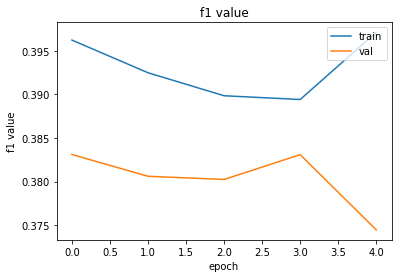

In [ ]:
plt.plot(f1s)
plt.plot(f1s_eval)
plt.title('f1 value')
plt.ylabel('f1 value')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

3. Поменяем значение дропаута

In [ ]:
model = clstm_clf(vocab_size=len(word2id), max_length=400, dropout = 0.3).to(DEVICE)
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001, weight_decay=0.0001) 
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(DEVICE)

losses = []
losses_eval = []
f1s = []
f1s_eval = []

for i in range(5):
    print(f'\nstarting Epoch {i}')
    print('Training...')
    epoch_loss = train(model, train_iterator, optimizer, criterion)
    losses.append(epoch_loss)
    print('\nEvaluating on train...')
    f1_on_train,_ = evaluate(model, train_iterator, criterion)
    f1s.append(f1_on_train)
    print('\nEvaluating on test...')
    f1_on_test, epoch_loss_on_test = evaluate(model, val_iterator, criterion)
    losses_eval.append(epoch_loss_on_test)
    f1s_eval.append(f1_on_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  



starting Epoch 0
Training...
Train loss: 1.6431483218544407
Train loss: 1.6026814357094143
Train loss: 1.5685666551479716
Train loss: 1.544934400748381
Train loss: 1.5304305611184723

Evaluating on train...
Val loss: 1.492187263672812, Val f1: 0.3943060636520386
Val loss: 1.481695984757465, Val f1: 0.3899197578430176
Val loss: 1.4769828691647922, Val f1: 0.39064374566078186
Val loss: 1.4750283249528893, Val f1: 0.3917869031429291
Val loss: 1.4709425500519961, Val f1: 0.39478644728660583

Evaluating on test...
Val loss: 1.5961135625839233, Val f1: 0.44125282764434814
Val loss: 1.554599779623526, Val f1: 0.39433059096336365
Val loss: 1.5307655886905949, Val f1: 0.3963545262813568
Val loss: 1.528553930195895, Val f1: 0.3851069211959839
Val loss: 1.5209611792495286, Val f1: 0.38308683037757874

starting Epoch 1
Training...
Train loss: 1.494698773350632
Train loss: 1.4801191558008608
Train loss: 1.4750194453090602
Train loss: 1.4697751379632331
Train loss: 1.469423544035651

Evaluating on 

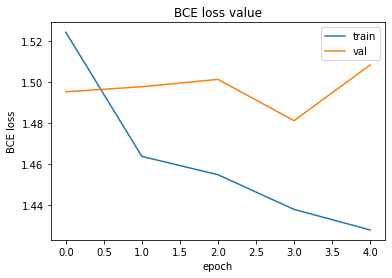

In [ ]:
plt.plot(losses)
plt.plot(losses_eval)
plt.title('BCE loss value')
plt.ylabel('BCE loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

4. Поменяем место дропаута

In [ ]:
model = clstm_clf(vocab_size=len(word2id), dropout_lstm = False, dropout_start = True, max_length=400, dropout = 0.5).to(DEVICE)
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001, weight_decay=0.0001) 
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(DEVICE)

losses = []
losses_eval = []
f1s = []
f1s_eval = []

for i in range(5):
    print(f'\nstarting Epoch {i}')
    print('Training...')
    epoch_loss = train(model, train_iterator, optimizer, criterion)
    losses.append(epoch_loss)
    print('\nEvaluating on train...')
    f1_on_train,_ = evaluate(model, train_iterator, criterion)
    f1s.append(f1_on_train)
    print('\nEvaluating on test...')
    f1_on_test, epoch_loss_on_test = evaluate(model, val_iterator, criterion)
    losses_eval.append(epoch_loss_on_test)
    f1s_eval.append(f1_on_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  



starting Epoch 0
Training...
Train loss: 1.6446925401687622
Train loss: 1.6178111719048542
Train loss: 1.5940808250724925
Train loss: 1.5676723512220176
Train loss: 1.5485963388297797

Evaluating on train...
Val loss: 1.4847266485816555, Val f1: 0.4013547897338867
Val loss: 1.473071267293847, Val f1: 0.3993469774723053
Val loss: 1.4694529213657268, Val f1: 0.39816513657569885
Val loss: 1.4721103153187476, Val f1: 0.39190760254859924
Val loss: 1.470483861992516, Val f1: 0.3912082314491272

Evaluating on test...
Val loss: 1.5952542561751146, Val f1: 0.44033282995224
Val loss: 1.5552092746452049, Val f1: 0.39331841468811035
Val loss: 1.531067330662797, Val f1: 0.3956364393234253
Val loss: 1.5285483793778853, Val f1: 0.38449981808662415
Val loss: 1.5206421976504119, Val f1: 0.3827139735221863

starting Epoch 1
Training...
Train loss: 1.5069846437688459
Train loss: 1.4853310564289923
Train loss: 1.4765419904896289
Train loss: 1.4742399722466737
Train loss: 1.472527599252219

Evaluating on 

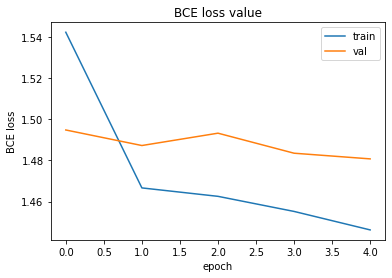

In [ ]:
plt.plot(losses)
plt.plot(losses_eval)
plt.title('BCE loss value')
plt.ylabel('BCE loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

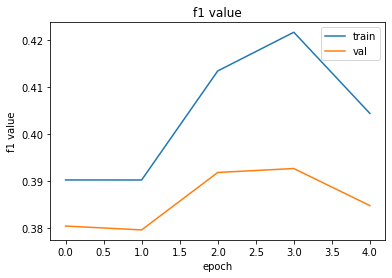

In [ ]:
plt.plot(f1s)
plt.plot(f1s_eval)
plt.title('f1 value')
plt.ylabel('f1 value')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Вывод
Итак, в целом, гиперпараметры значительно не поменяли результат. В целом результаты везде получились не очень хорошими, возможно, из-за неравномерного распределения классов в датасете. Плюс, к сожалению, ограничение GPU не позволяет проводить достаточно много эпох, что тоже плохо сказывается на качестве моделей.